# Prime Number Fun with the Apple Watch


## Run Durations That Last In Prime Number Minutes

To make running fun and interesting, I decided to make my September 2020 runs follow these requirements:

1. No runs shorter than 20 minutes.
2. The duration in minutes should be close to a prime number. 
3. A maximum threshold of 10 seconds over the prime-number minute, otherwise I have to run until the arrival of next prime number minute.


### Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/running-stories/apple-watch-tracking"

In [5]:
runs = pd.read_csv(f"{study_path}/apple_watch_runs_prime_202009.csv",parse_dates=['start_date'])

### The View of September Runs

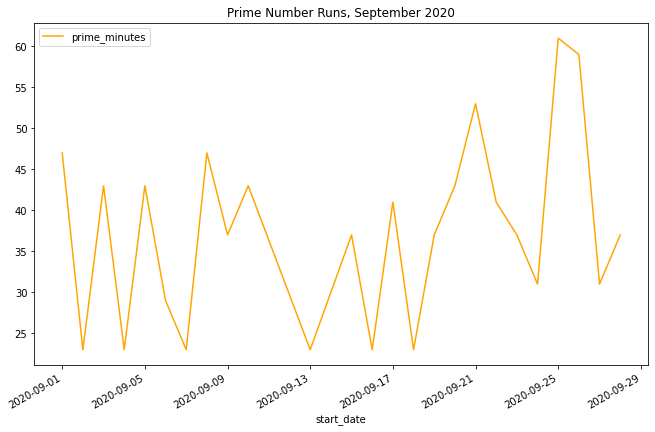

In [6]:
runs_plot = runs.plot.line(y=['prime_minutes'],
                           x='start_date',
                           title='Prime Number Runs, September 2020', 
                           color = 'orange',
                           figsize=(11, 7))

In [7]:
runs_plot.get_figure().savefig(f"{study_path}/sep2020_prime_lineplot")

### Frequency Distribution of Prime Number Durations

In [8]:
grouped_primes = runs.groupby('prime_minutes').count()

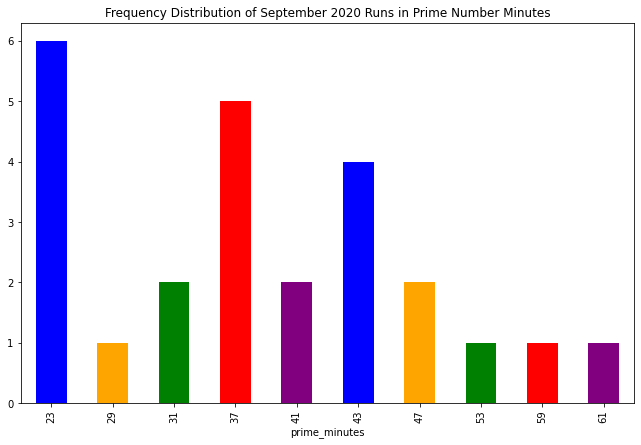

In [9]:
barplot = grouped_primes.plot.bar(y="miles", 
                                  legend=False,
                                  color=['blue', 'orange', 'green', 'red', 'purple'],
                                  title = "Frequency Distribution of September 2020 Runs in Prime Number Minutes",
                                  figsize=(11, 7))

In [10]:
barplot.get_figure().savefig(f"{study_path}/sep2020_prime_frequency")

### Statistics

In [11]:
runs.describe().loc[:,["minutes"]]

,minutes
count,25.000000
mean,37.446400
std,11.190653
min,23.024000
25%,29.034000
50%,37.054000
75%,43.036000
max,61.112000
